In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [4]:
df["TARGET"] = boston.target

In [5]:
scaler = StandardScaler()
scaler.fit(df.values[:,:-1])

df.values[:, :-1] = scaler.transform(df.values[:, :-1].round(4))

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
data = torch.from_numpy(df.values).float()
x = data[:,:-1]
y = data[:, -1:]

In [9]:
n_epochs = 200000
learning_rate = 1e-4
print_interval = 10000

In [12]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__() 
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.linear1 = nn.Linear(input_dim, 3)
        self.linear2 = nn.Linear(3, 3)
        self.linear3 = nn.Linear(3, 3)
        self.linear4 = nn.Linear(3, output_dim)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.act(x)
        x = self.linear2(x)
        x = self.act(x)
        x = self.linear3(x)
        x = self.act(x)
        y = self.linear4(x)

        return y

model = MyModel(x.size(-1), y.size(-1))

print(model)

MyModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=3, bias=True)
  (linear4): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)


In [14]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1))
)
print(model)

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=3, out_features=1, bias=True)
)


In [15]:
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [16]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % print_interval == 0:
        print("Epoch %d: loss=%.4e"%(i+1, loss))

Epoch 10000: loss=5.6033e+01
Epoch 20000: loss=4.4956e+01
Epoch 30000: loss=3.9829e+01
Epoch 40000: loss=2.9101e+01
Epoch 50000: loss=2.7902e+01
Epoch 60000: loss=2.8467e+01
Epoch 70000: loss=2.6836e+01
Epoch 80000: loss=2.5366e+01
Epoch 90000: loss=2.2742e+01
Epoch 100000: loss=2.1712e+01
Epoch 110000: loss=2.2707e+01
Epoch 120000: loss=1.9591e+01
Epoch 130000: loss=1.8305e+01
Epoch 140000: loss=1.8071e+01
Epoch 150000: loss=1.9224e+01
Epoch 160000: loss=2.0009e+01
Epoch 170000: loss=1.7131e+01
Epoch 180000: loss=1.5153e+01
Epoch 190000: loss=1.5899e+01
Epoch 200000: loss=1.3968e+01


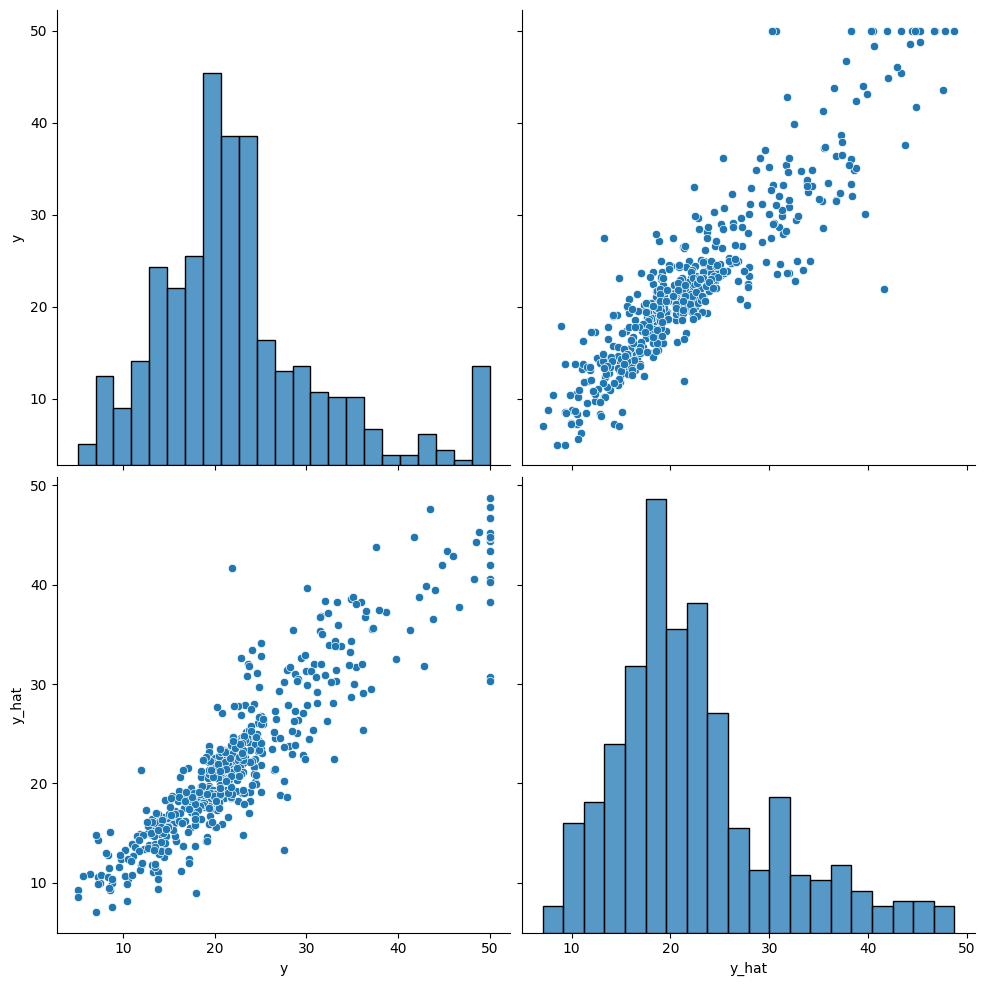

In [17]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns = ["y", "y_hat"])
sns.pairplot(df, height = 5)
plt.show()